<h1>FIGURE 1<span class="tocSkip"></span></h1>

###### Dynamics of the detailed model of calcium-based synaptic plasticity for three different neuronal setups P1, P2, and P3.

<h1>Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc"><ul class="toc-item"><li><span><a href="#Population-1" data-toc-modified-id="Population-1-1">Population 1</a></span><ul class="toc-item"><li><span><a href="#LTP" data-toc-modified-id="LTP-1.1">LTP</a></span></li><li><span><a href="#LTD" data-toc-modified-id="LTD-1.2">LTD</a></span></li></ul></li><li><span><a href="#Population-2" data-toc-modified-id="Population-2-2">Population 2</a></span><ul class="toc-item"><li><span><a href="#LTP" data-toc-modified-id="LTP-2.1">LTP</a></span></li><li><span><a href="#LTD" data-toc-modified-id="LTD-2.2">LTD</a></span></li></ul></li><li><span><a href="#Population-3" data-toc-modified-id="Population-3-3">Population 3</a></span><ul class="toc-item"><li><span><a href="#No-competition" data-toc-modified-id="No-competition-3.1">No competition</a></span></li><li><span><a href="#Strong-competition" data-toc-modified-id="Strong-competition-3.2">Strong competition</a></span></li></ul></li></ul></div>

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
import matplotlib.pyplot as plt

import cbsp

cbsp.set_simulation_time(5.0)  # global simulation time

## Population 1
This example uses the linear calcium neuron model. Other implemented dynamics include:
- `cbsp.population_1.non_linear_calcium`

In [19]:
print(cbsp.population_1.__doc__)

Simulations of neural population 1.

Simulations of linear- and non-linear, calcium-based, spike-timing-dependent synaptic plasticity 
of a homogeneous presynaptic population of 1000 neurons wired onto a single postsynaptic neuron.
Postsynaptic firing is generated by a poisson process.
Methods for abstracting the STDP to rate-based plasticity for large parameter spaces.

    Simple usage example:

        cbsp.set_simulation_time(2.0)
        cbsp.set_timstep(0.001)
        cbsp.population_1.linear_calcium(u=10, v=20, w0=0.5, seed=10)



In [18]:
print(cbsp.population_1.linear_calcium.__doc__)

Integrate the spike-timing dependent synaptic strength.
    
    Args:
        u (float): presynaptic firing rate.
        v (float): postsynaptic firing rate.
        w0 (float): initial synapse strength.
        seed (int): random state.
    
    Returns:
        tuple: (w, t, (u, v, I, c))
            with 
                array: w, change of synapse strengths. Shape (#synapses, #timesteps).
                array: t, time.
                array: u, presynaptic spike trains. Shape (#synapses, #timesteps).
                array: v, postsynaptic spike train. Shape (#timesteps).
                array: I, postsynaptic current. Shape (#timesteps).
                array: c, calcium traces. Shape (#synapses, #timesteps).
    


### LTP

In [3]:
w, t, (u, v, I, c) = cbsp.population_1.linear_calcium(u=40, 
                                                       v=40, 
                                                       w0=0.6, 
                                                       seed=0)

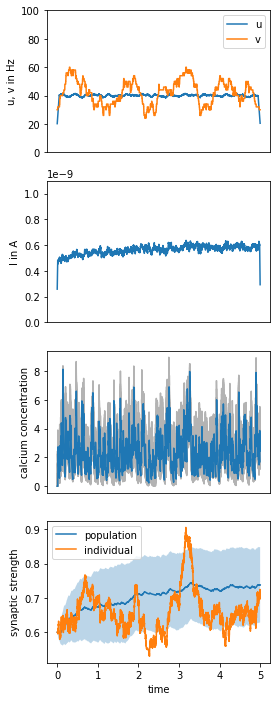

In [4]:
fig, axes = cbsp.population_1.plot_dynamics(w, t, u, v, I, c)

### LTD

In [5]:
w, t, (u, v, I, c) = cbsp.population_1.linear_calcium(u=40, 
                                                       v=5, 
                                                       w0=0.6, 
                                                       seed=0)

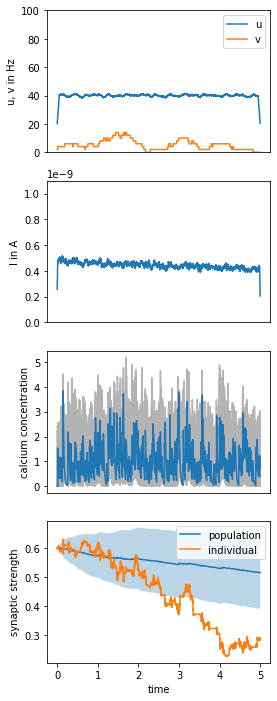

In [6]:
fig, axes = cbsp.population_1.plot_dynamics(w, t, u, v, I, c)

## Population 2

This example uses the linear calcium + MAT neuron model. Other implemented dynamics include:
- `cbsp.population_2.non_linear_calcium_mat`
- `cbso.population_2.linear_calcium_aeif`

In [20]:
print(cbsp.population_2.__doc__)

Simulations of neural population 2.

Simulations of linear- and non-linear, calcium-based, spike-timing-dependent synaptic plasticity 
of a homogeneous presynaptic population of 1000 neurons wired onto a single postsynaptic neuron.
Postsynaptic firing underlies the MAT or AEIF model.
Methods for abstracting the STDP to rate-based plasticity for large parameter spaces.

    Simple usage example:

        cbsp.set_simulation_time(2.0)
        cbsp.set_timstep(0.001)
        cbsp.population_2.linear_calcium_mat(u=10, w0=0.5, seed=10)



In [21]:
print(cbsp.population_2.linear_calcium_mat.__doc__)

Integrate the spike-timing dependent synaptic strength.
    
    Args:
        u (float): presynaptic firing rate.
        w0 (float): initial synapse strength.
        seed (int): random state.
    
    Returns:
        tuple: (w, t, (u, v, I, c))
            with 
                array: w, change of synapse strengths. Shape (#synapses, #timesteps).
                array: t, time.
                array: u, presynaptic spike trains. Shape (#synapses, #timesteps).
                array: v, postsynaptic spike train. Shape (#timesteps).
                array: I, postsynaptic current. Shape (#timesteps).
                array: c, calcium traces. Shape (#synapses, #timesteps).
    


### LTP

In [7]:
w, t, (u, v, I, c) = cbsp.population_2.linear_calcium_mat(u=60, 
                                                          w0=0.6, 
                                                          seed=1)

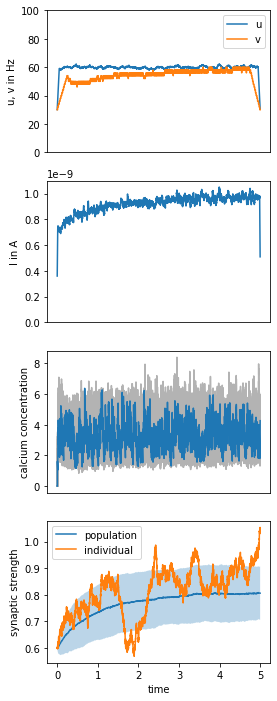

In [8]:
fig, axes = cbsp.population_2.plot_dynamics(w, t, u, v, I, c)

### LTD

In [9]:
w, t, (u, v, I, c) = cbsp.population_2.linear_calcium_mat(u=30, 
                                                          w0=0.6, 
                                                          seed=1)

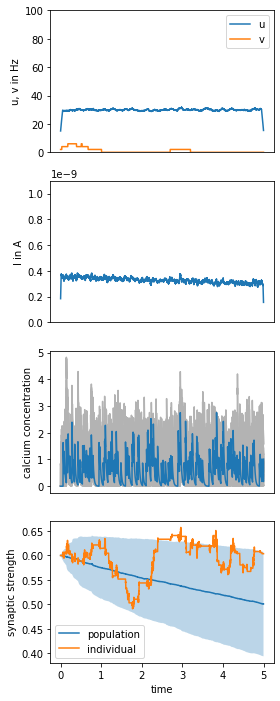

In [10]:
fig, axes = cbsp.population_2.plot_dynamics(w, t, u, v, I, c)

## Population 3

This example uses the linear calcium + MAT neuron model. Other implemented dynamics include:
- `cbsp.population_3.non_linear_calcium_mat`
- `cbso.population_3.linear_calcium_aeif`

In [22]:
print(cbsp.population_3.__doc__)

Simulations of neural population 3.

Simulations of linear- and non-linear, calcium-based, spike-timing-dependent synaptic plasticity 
of two independent homogeneous presynaptic population of 1000 neurons wired onto a single postsynaptic neuron.
Postsynaptic firing underlies the MAT or AEIF model.
Methods for abstracting the STDP to rate-based plasticity for large parameter spaces.

    Simple usage example:

        cbsp.set_simulation_time(2.0)
        cbsp.set_timstep(0.001)
        cbsp.population_3.linear_calcium_mat(u1=10, w1=0.5, u2=10, w2=10, seed=10)



### No competition

In [11]:
(w1, w2), t, (u1, u2, v, I, c1, c2) = cbsp.population_3.linear_calcium_mat(u1=5, 
                                                                           w1=0.9,
                                                                           u2=60,
                                                                           w2=0.6,
                                                                           seed=1)

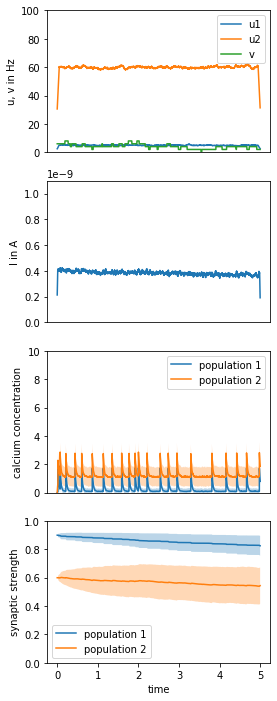

In [12]:
fig, axes = cbsp.population_3.plot_dynamics(w1, w2, t, u1, u2, v, I, c1, c2)

### Strong competition

In [13]:
(w1, w2), t, (u1, u2, v, I, c1, c2) = cbsp.population_3.linear_calcium_mat(u1=5, 
                                                                           w1=0.9,
                                                                           u2=80,
                                                                           w2=0.6,
                                                                           seed=1)

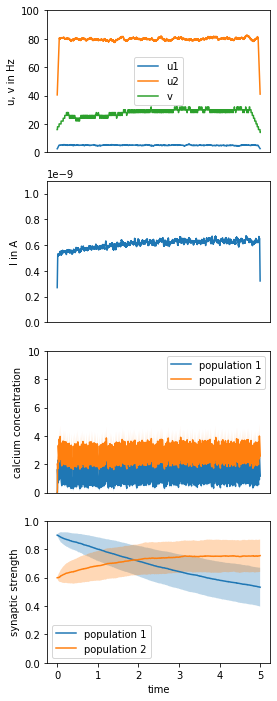

In [14]:
fig, axes = cbsp.population_3.plot_dynamics(w1, w2, t, u1, u2, v, I, c1, c2)